In [1]:
%matplotlib inline

import time
import datetime as dt
import os
import glob
import json

import itertools as it

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

os.getcwd()

'/home/edmz/Data Covid/Code'

In [2]:
from dicts_paths_v2 import *
from calc_functions_v2 import *
from graph_functions_v2 import *

https://www.data.gouv.fr/fr/datasets/donnees-hospitalieres-relatives-a-lepidemie-de-covid-19/

https://www.data.gouv.fr/fr/datasets/donnees-relatives-aux-resultats-des-tests-virologiques-covid-19/

https://www.data.gouv.fr/fr/datasets/donnees-relatives-aux-personnes-vaccinees-contre-la-covid-19-1/

In [3]:
print(today)
print(date_choice)
print(date)
print(date_text)

2021-04-07
2021-04-06
2021-04-06
06/04/2021


### File paths

In [4]:
print('SIDEP\n   Données d\'entrée :') 
print(path_test)
print(fname_temp_test)
print(fname_output_test)

print('Données hospitalières\n   Données d\'entrée :') 
print(path_hosp)
print(fname_temp_hosp)
print(fname_output_hosp)

print('VAC-SI\n   Données d\'entrée :') 
print(path_vac)
print(fname_temp_vac)
print(fname_output_vac)

SIDEP
   Données d'entrée :
['../Data/sp-pos-quot-dep-2021-04-06-19h11.csv']
./Temp/sp-pos-quot-dep-2021-04-06-19h11
../Output/sp-pos-quot-dep-2021-04-06-19h11
Données hospitalières
   Données d'entrée :
['../Data/donnees-hospitalieres-classe-age-covid19-2021-04-06-19h06.csv']
./Temp/donnees-hospitalieres-classe-age-covid19-2021-04-06-19h06
../Output/donnees-hospitalieres-classe-age-covid19-2021-04-06-19h06
VAC-SI
   Données d'entrée :
['../Data/vacsi-a-dep-2021-04-06-19h16.csv']
./Temp/vacsi-a-dep-2021-04-06-19h16
../Output/vacsi-a-dep-2021-04-06-19h16


### Dictionnaries

In [5]:
print('Dict. reg_name\n     "11" :', reg_name['11'])
print('Dict. reg2dep\n     "Corse" :', reg2dep['Corse'])
print('Dict. dep2reg\n     "75" :', dep2reg['75'])
print('Dict. dep_name\n     "67" :', dep_name['67'])
print('Dict. class_2_3C\n      29 : ', class_2_3C[29])
print('Dict reg_3C_pop\n     "Grand Est" :', reg_3C_pop['Grand Est'])
print('Dict reg_2lignes\n      "Auvergne-Rhône-Alpes" :', reg_2lignes["Auvergne-Rhône-Alpes"], sep = '\n')

Dict. reg_name
     "11" : Île-de-France
Dict. reg2dep
     "Corse" : ['2A', '2B']
Dict. dep2reg
     "75" : Île-de-France
Dict. dep_name
     "67" : Bas-Rhin
Dict. class_2_3C
      29 :  0-29
Dict reg_3C_pop
     "Grand Est" : {'0-29': 1874571, '30-59': 2124342, '60+': 1512834, 'whole': 5511747}
Dict reg_2lignes
      "Auvergne-Rhône-Alpes" :
Auvergne-
Rhône-Alpes


### Functions

In [6]:
help(groupby_sum)

Help on function groupby_sum in module calc_functions_v2:

groupby_sum(d, columns)
    d: dataframe
    columns: list of column names
    returns: dataframe is grouped according to columns fed in
            other columns are summed
            dataframe is then formatted into a dataframe



In [7]:
help(columns_first)

Help on function columns_first in module calc_functions_v2:

columns_first(d, columns)
    d: dataframe
    by: a list of column names
    returns: dataframe reordered



In [8]:
help(calc_hebdo)

Help on function calc_hebdo in module calc_functions_v2:

calc_hebdo(d, columns_to_group, columns_to_sum)
    d: a dataframe
    columns_to_group: list of columns from which groups will be formed
            for example ['entity', 'three_class'] -> will calculate hebdo sums for (regionA, class1), (regionA, class2), etc.
    columns_to_sum: list of columns which values will be summed on a week-wise base
            for example ['P', 'T']



# Traitement des données SIDEP

In [9]:
fname = path_test[0]
din = pd.read_csv(fname, sep = ';', parse_dates = ['jour'], dtype = {'dep': str})
din.sample(3)

,dep,jour,P,T,cl_age90,pop
120616,33,2020-12-06,2,57,19,201526.0
104421,2B,2020-06-20,0,0,90,2578.0
188087,52,2020-10-06,0,2,90,2860.0


In [10]:
d = din.copy()
d = d.rename(columns = {'dep': 'entity'})
d = columns_first(d, columns = ['entity', 'cl_age90', 'jour'])
d_dep = d
d_dep.sample(3)

,entity,cl_age90,jour,P,T,pop
8275,03,39,2020-08-21,2,74,33349.0
92887,27,39,2021-03-03,39,317,73301.0
217074,60,9,2020-11-03,30,168,105005.0


In [11]:
d = din.copy()
d['reg'] = d['dep'].map(lambda x: dep2reg[x])
d = d.drop(columns = ['dep'])
dg = groupby_sum(d, columns = ['reg', 'jour', 'cl_age90'])
dg = d.rename(columns = {'reg': 'entity'})
dg = columns_first(dg, columns = ['entity', 'cl_age90', 'jour'])
d_reg = dg
d_reg.sample(3)

,entity,cl_age90,jour,P,T,pop
286378,Nouvelle-Aquitaine,49,2021-02-17,12,212,47239.0
281349,Île-de-France,29,2020-10-09,144,1056,157603.0
265933,Auvergne-Rhône-Alpes,89,2020-07-03,0,31,31929.0


In [12]:
d = din.copy()
d = d.drop(columns = ['dep'])
dg = groupby_sum(d, columns = ['jour', 'cl_age90'])
dg['entity'] = 'France entière'
dg = columns_first(dg, columns = ['entity', 'cl_age90', 'jour'])
d_nat = dg
d_nat.sample(3)

,entity,cl_age90,jour,P,T,pop
1256,France entière,19,2020-09-04,1352,18796,8.336486e+06
1305,France entière,69,2020-09-08,741,19089,8.004083e+06
1785,France entière,29,2020-10-22,9380,65814,7.476787e+06


In [13]:
d = pd.merge(d_dep, d_reg, how = 'outer')
dout = pd.merge(d, d_nat, how = 'outer')
dout = columns_first(dout, columns = ['entity', 'cl_age90', 'jour'])
dout.head(3)

,entity,cl_age90,jour,P,T,pop
0,01,9,2020-05-13,0,16,83001.0
1,01,19,2020-05-13,1,17,84665.0
2,01,29,2020-05-13,0,34,65496.0


In [14]:
dout.tail(3)

,entity,cl_age90,jour,P,T,pop
749471,France entière,79,2021-04-03,1077,19766,5.695639e+06
749472,France entière,89,2021-04-03,578,9568,3.245281e+06
749473,France entière,90,2021-04-03,198,3310,9.125806e+05


In [15]:
fname = fname_temp_test + '-tot.csv'
dout.to_csv(fname, sep = ';', index = False)

### SIDEP - 3 classes d'âge

In [16]:
fname = fname_temp_test + '-tot.csv'
din = pd.read_csv(fname, 
                sep = ';', 
                parse_dates = ['jour'], 
                dtype = {'entity': str},
                skiprows = [])
din.tail(3)

,entity,cl_age90,jour,P,T,pop
749471,France entière,79,2021-04-03,1077,19766,5.695639e+06
749472,France entière,89,2021-04-03,578,9568,3.245281e+06
749473,France entière,90,2021-04-03,198,3310,9.125806e+05


In [17]:
d = din.copy()
d['three_class'] = d['cl_age90'].map(lambda x: class_2_3C[x])
d = d.drop(columns = 'cl_age90')
dg = groupby_sum(d,['entity', 'jour', 'three_class'])
dg = columns_first(dg, columns = ['entity', 'three_class', 'jour'])
dout = dg
dout.tail(10)

,entity,three_class,jour,P,T,pop
155166,Île-de-France,60+,2021-04-01,1558,15558,2517033.0
155167,Île-de-France,whole,2021-04-01,12727,143737,12278210.0
155168,Île-de-France,0-29,2021-04-02,4892,69614,4792882.0
155169,Île-de-France,30-59,2021-04-02,5977,67355,4968295.0
155170,Île-de-France,60+,2021-04-02,1437,16302,2517033.0
155171,Île-de-France,whole,2021-04-02,12309,153355,12278210.0
155172,Île-de-France,0-29,2021-04-03,2796,40484,4792882.0
155173,Île-de-France,30-59,2021-04-03,3613,44061,4968295.0
155174,Île-de-France,60+,2021-04-03,876,9624,2517033.0
155175,Île-de-France,whole,2021-04-03,7289,94220,12278210.0


In [18]:
fname = fname_temp_test + '-tot-3C.csv'
dout.to_csv(fname, sep = ';', index = False)

### SIDEP - calculs chiffres hebdomadaires

In [19]:
fname = fname_temp_test + '-tot-3C.csv'
din = pd.read_csv(fname, 
                sep = ';', 
                parse_dates = ['jour'], 
                dtype = {'entity': str},
                skiprows = [])
din.sample(3)

,entity,three_class,jour,P,T,pop
143456,Grand Est,0-29,2020-05-17,0,60,1874571.0
66902,51,60+,2020-08-20,2,414,147180.0
54743,41,whole,2021-03-28,16,178,327835.0


In [20]:
d = din.copy()

dh = calc_hebdo(d, 
           columns_to_group = ['entity', 'three_class'], 
           columns_to_sum = ['P', 'T'])

0.38 s : (P hebdo, T hebdo) calculated for (01, 0-29)
0.75 s : (P hebdo, T hebdo) calculated for (01, 30-59)
1.13 s : (P hebdo, T hebdo) calculated for (01, 60+)
1.50 s : (P hebdo, T hebdo) calculated for (01, whole)
1.88 s : (P hebdo, T hebdo) calculated for (02, 0-29)
2.26 s : (P hebdo, T hebdo) calculated for (02, 30-59)
2.63 s : (P hebdo, T hebdo) calculated for (02, 60+)
3.05 s : (P hebdo, T hebdo) calculated for (02, whole)
3.43 s : (P hebdo, T hebdo) calculated for (03, 0-29)
3.82 s : (P hebdo, T hebdo) calculated for (03, 30-59)
4.19 s : (P hebdo, T hebdo) calculated for (03, 60+)
4.58 s : (P hebdo, T hebdo) calculated for (03, whole)
4.96 s : (P hebdo, T hebdo) calculated for (04, 0-29)
5.34 s : (P hebdo, T hebdo) calculated for (04, 30-59)
5.71 s : (P hebdo, T hebdo) calculated for (04, 60+)
6.10 s : (P hebdo, T hebdo) calculated for (04, whole)
6.47 s : (P hebdo, T hebdo) calculated for (05, 0-29)
6.85 s : (P hebdo, T hebdo) calculated for (05, 30-59)
7.23 s : (P hebdo, T he

57.02 s : (P hebdo, T hebdo) calculated for (37, 30-59)
57.39 s : (P hebdo, T hebdo) calculated for (37, 60+)
57.76 s : (P hebdo, T hebdo) calculated for (37, whole)
58.13 s : (P hebdo, T hebdo) calculated for (38, 0-29)
58.50 s : (P hebdo, T hebdo) calculated for (38, 30-59)
58.87 s : (P hebdo, T hebdo) calculated for (38, 60+)
59.24 s : (P hebdo, T hebdo) calculated for (38, whole)
59.61 s : (P hebdo, T hebdo) calculated for (39, 0-29)
59.98 s : (P hebdo, T hebdo) calculated for (39, 30-59)
60.35 s : (P hebdo, T hebdo) calculated for (39, 60+)
60.72 s : (P hebdo, T hebdo) calculated for (39, whole)
61.09 s : (P hebdo, T hebdo) calculated for (40, 0-29)
61.46 s : (P hebdo, T hebdo) calculated for (40, 30-59)
61.83 s : (P hebdo, T hebdo) calculated for (40, 60+)
62.20 s : (P hebdo, T hebdo) calculated for (40, whole)
62.57 s : (P hebdo, T hebdo) calculated for (41, 0-29)
62.94 s : (P hebdo, T hebdo) calculated for (41, 30-59)
63.31 s : (P hebdo, T hebdo) calculated for (41, 60+)
63.68 

112.81 s : (P hebdo, T hebdo) calculated for (74, 30-59)
113.18 s : (P hebdo, T hebdo) calculated for (74, 60+)
113.56 s : (P hebdo, T hebdo) calculated for (74, whole)
113.94 s : (P hebdo, T hebdo) calculated for (75, 0-29)
114.31 s : (P hebdo, T hebdo) calculated for (75, 30-59)
114.68 s : (P hebdo, T hebdo) calculated for (75, 60+)
115.07 s : (P hebdo, T hebdo) calculated for (75, whole)
115.44 s : (P hebdo, T hebdo) calculated for (76, 0-29)
115.81 s : (P hebdo, T hebdo) calculated for (76, 30-59)
116.18 s : (P hebdo, T hebdo) calculated for (76, 60+)
116.55 s : (P hebdo, T hebdo) calculated for (76, whole)
116.92 s : (P hebdo, T hebdo) calculated for (77, 0-29)
117.29 s : (P hebdo, T hebdo) calculated for (77, 30-59)
117.66 s : (P hebdo, T hebdo) calculated for (77, 60+)
118.03 s : (P hebdo, T hebdo) calculated for (77, whole)
118.40 s : (P hebdo, T hebdo) calculated for (78, 0-29)
118.81 s : (P hebdo, T hebdo) calculated for (78, 30-59)
119.18 s : (P hebdo, T hebdo) calculated fo

165.86 s : (P hebdo, T hebdo) calculated for (France entière, 60+)
166.26 s : (P hebdo, T hebdo) calculated for (France entière, whole)
166.63 s : (P hebdo, T hebdo) calculated for (Grand Est, 0-29)
167.00 s : (P hebdo, T hebdo) calculated for (Grand Est, 30-59)
167.37 s : (P hebdo, T hebdo) calculated for (Grand Est, 60+)
167.74 s : (P hebdo, T hebdo) calculated for (Grand Est, whole)
168.12 s : (P hebdo, T hebdo) calculated for (Hauts-de-France, 0-29)
168.49 s : (P hebdo, T hebdo) calculated for (Hauts-de-France, 30-59)
168.86 s : (P hebdo, T hebdo) calculated for (Hauts-de-France, 60+)
169.23 s : (P hebdo, T hebdo) calculated for (Hauts-de-France, whole)
169.60 s : (P hebdo, T hebdo) calculated for (Normandie, 0-29)
169.97 s : (P hebdo, T hebdo) calculated for (Normandie, 30-59)
170.34 s : (P hebdo, T hebdo) calculated for (Normandie, 60+)
170.75 s : (P hebdo, T hebdo) calculated for (Normandie, whole)
171.12 s : (P hebdo, T hebdo) calculated for (Nouvelle-Aquitaine, 0-29)
171.49 s 

In [21]:
dh.sample(3)

,entity,three_class,jour,P,T,pop,P hebdo,T hebdo
152497,Pays de la Loire,30-59,2021-03-17,444,7225,1426597.0,2889.0,45272.0
73479,56,whole,2020-09-03,67,1588,755566.0,254.0,8413.0
64803,49,whole,2020-12-25,4,322,815881.0,762.0,27257.0


In [22]:
d = dh
d['incidence hebdo'] = d['P hebdo'] / d['pop'] * 100000
d['positivite hebdo'] = d['P hebdo'] / d['T hebdo'] * 100
d['taux de test hebdo'] = d['T hebdo'] / d['pop'] * 100000
d.sample(3)

,entity,three_class,jour,P,T,pop,P hebdo,T hebdo,incidence hebdo,positivite hebdo,taux de test hebdo
32053,26,30-59,2020-11-18,79,696,196800.0,744.0,5477.0,378.048780,13.584079,2783.028455
29338,24,60+,2020-10-22,50,490,154360.0,200.0,2501.0,129.567245,7.996801,1620.238404
1204,01,0-29,2021-03-10,77,1191,233162.0,392.0,7781.0,168.123451,5.037913,3337.164718


In [23]:
d.tail(3)

,entity,three_class,jour,P,T,pop,P hebdo,T hebdo,incidence hebdo,positivite hebdo,taux de test hebdo
155173,Île-de-France,30-59,2021-04-03,3613,44061,4968295.0,38839.0,363720.0,781.736994,10.678269,7320.821328
155174,Île-de-France,60+,2021-04-03,876,9624,2517033.0,9926.0,101627.0,394.353193,9.767089,4037.571220
155175,Île-de-France,whole,2021-04-03,7289,94220,12278210.0,81094.0,853009.0,660.470867,9.506816,6947.340044


In [24]:
fname = fname_temp_test + '-tot-3C-processed.csv'
d.to_csv(fname, sep = ';', index = False)

# Traitement des données hospitalières

In [25]:
fname = path_hosp[0]
din = pd.read_csv(fname, sep = ';', parse_dates = ['jour'], dtype = {'dep': str})
din.sample(3)

,reg,cl_age90,jour,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
9169,11,59,2020-05-03,1253,394,NaN,NaN,NaN,3489,411
26581,6,49,2020-07-30,0,0,NaN,NaN,NaN,54,4
10656,76,79,2020-05-10,109,36,NaN,NaN,NaN,469,91


In [26]:
d = din.copy()
d['entity'] = (d['reg']
               .map(lambda x: reg_name[str(x)] )
               .replace({
                   'Guadeloupe':'Outre-mer',
                   'Martinique':'Outre-mer',
                   'Guyane':'Outre-mer',
                   'La Réunion':'Outre-mer',
                   'Mayotte':'Outre-mer',
               })
              )
d = columns_first(d, columns = ['entity'])
d = d.drop(columns = ['reg'])
d.head(3)

,entity,cl_age90,jour,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
0,Outre-mer,0,2020-03-18,0,0,NaN,NaN,NaN,0,0
1,Outre-mer,9,2020-03-18,0,0,NaN,NaN,NaN,0,0
2,Outre-mer,19,2020-03-18,0,0,NaN,NaN,NaN,0,0


In [27]:
d['three_class'] = d['cl_age90'].map(lambda x: class_2_3C[x])
d = d.drop(columns = 'cl_age90')
dg = groupby_sum(d,['entity', 'jour', 'three_class',])
# dg = (dg.reset_index()
#       .drop(columns = ['cl_age90'])
#             )
dg = columns_first(dg, ['entity', 'three_class', 'jour',])
d_reg = dg.copy()
d_reg.tail(3)

,entity,three_class,jour,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
21557,Île-de-France,30-59,2021-04-06,1923,575,1150.0,154.0,44.0,24268,1288
21558,Île-de-France,60+,2021-04-06,5676,1047,2907.0,1685.0,37.0,48024,15737
21559,Île-de-France,whole,2021-04-06,7850,1660,4237.0,1859.0,94.0,77511,17169


In [28]:
d = d_reg.copy()
dg = groupby_sum(d, columns = ['jour', 'three_class',])
dg['entity'] = 'France entière'
dg = columns_first(dg, columns = ['entity', 'three_class', 'jour',])
d_nat = dg
d_nat.sample(3)

,entity,three_class,jour,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
148,France entière,0-29,2020-04-24,437,82,0.0,0.0,0.0,2538,21
1410,France entière,60+,2021-03-05,20616,2661,0.0,0.0,0.0,182952,59857
590,France entière,60+,2020-08-12,3832,258,0.0,0.0,0.0,54118,18418


In [29]:
d_tot = pd.merge(d_reg, d_nat, how = 'outer')
d_tot = d_tot.drop(columns = ['HospConv', 'SSR_USLD', 'autres', 'rad'])
d_tot.sample(3)

,entity,three_class,jour,hosp,rea,dc
6929,Corse,30-59,2020-09-26,6,0,2
15559,Outre-mer,whole,2020-04-26,96,26,34
2393,Bourgogne-Franche-Comté,30-59,2020-10-17,20,3,40


In [30]:
d = d_tot
d = calc_delta_hebdo(d, columns_to_group = ['entity', 'three_class'], columns_to_delta = ['dc'])

0.53 s : (dc hebdo) calculated for (Auvergne-Rhône-Alpes, 0-29)
1.04 s : (dc hebdo) calculated for (Auvergne-Rhône-Alpes, 30-59)
1.54 s : (dc hebdo) calculated for (Auvergne-Rhône-Alpes, 60+)
2.05 s : (dc hebdo) calculated for (Auvergne-Rhône-Alpes, whole)
2.56 s : (dc hebdo) calculated for (Bourgogne-Franche-Comté, 0-29)
3.06 s : (dc hebdo) calculated for (Bourgogne-Franche-Comté, 30-59)
3.57 s : (dc hebdo) calculated for (Bourgogne-Franche-Comté, 60+)
4.08 s : (dc hebdo) calculated for (Bourgogne-Franche-Comté, whole)
4.58 s : (dc hebdo) calculated for (Bretagne, 0-29)
5.08 s : (dc hebdo) calculated for (Bretagne, 30-59)
5.58 s : (dc hebdo) calculated for (Bretagne, 60+)
6.08 s : (dc hebdo) calculated for (Bretagne, whole)
6.58 s : (dc hebdo) calculated for (Centre-Val de Loire, 0-29)
7.09 s : (dc hebdo) calculated for (Centre-Val de Loire, 30-59)
7.61 s : (dc hebdo) calculated for (Centre-Val de Loire, 60+)
8.12 s : (dc hebdo) calculated for (Centre-Val de Loire, whole)
8.62 s : (dc

In [31]:
d['taux hosp'] = d.apply(lambda x: x['hosp'] / reg_3C_pop 
                                                    [ x['entity'] ]
                                                    [ x['three_class'] ] * 100000, 
                         axis = "columns")
d['taux rea'] = d.apply(lambda x: x['rea'] / reg_3C_pop
                                                    [ x['entity'] ]
                                                    [ x['three_class'] ] * 100000, 
                        axis = "columns")
d['taux décès'] = d.apply(lambda x: x['dc hebdo'] / reg_3C_pop
                                                    [ x['entity'] ]
                                                    [ x['three_class'] ] * 100000, 
                        axis = "columns")
d

,entity,three_class,jour,hosp,rea,dc,dc hebdo,taux hosp,taux rea,taux décès
0,Auvergne-Rhône-Alpes,0-29,2020-03-18,4,0,0,0.0,0.141085,0.000000,0.000000
1,Auvergne-Rhône-Alpes,30-59,2020-03-18,33,11,1,0.0,1.069485,0.356495,0.000000
2,Auvergne-Rhône-Alpes,60+,2020-03-18,127,24,6,0.0,6.014371,1.136574,0.000000
3,Auvergne-Rhône-Alpes,whole,2020-03-18,172,35,7,0.0,2.141334,0.435737,0.000000
4,Auvergne-Rhône-Alpes,0-29,2020-03-19,5,1,0,0.0,0.176356,0.035271,0.000000
...,...,...,...,...,...,...,...,...,...,...
23095,France entière,whole,2021-04-05,29907,5433,70771,1814.0,44.560832,8.095061,2.702824
23096,France entière,0-29,2021-04-06,512,59,75,3.0,2.171656,0.250249,0.012725
23097,France entière,30-59,2021-04-06,5922,1621,3209,100.0,23.059911,6.312076,0.389394
23098,France entière,60+,2021-04-06,23948,3893,67515,1768.0,134.105495,21.800263,9.900556


In [32]:
dout = d
fname = fname_temp_hosp + '-processed.csv'
dout.to_csv(fname, sep = ';', index = False)

# Données VAC-SI 

In [33]:
fname = path_vac[0]
din = pd.read_csv(fname, sep = ';', parse_dates = ['jour'], dtype = {'dep': str})
din.sample(3)

,dep,clage_vacsi,jour,n_dose1,n_dose2,n_cum_dose1,n_cum_dose2
2664,02,69,2021-03-01,31,2,1167,619
95029,93,24,2021-01-25,0,0,41,0
95353,93,49,2021-02-18,97,98,1823,904


In [34]:
d = din.copy()
d = d[(d.dep != '00') & (d.dep != '750') & (d.dep != '970')] 
d = d.rename(columns = {'dep': 'entity'})
d = columns_first(d, columns = ['entity', 'clage_vacsi', 'jour'])
d_dep = d
d_dep.sample(3)

,entity,clage_vacsi,jour,n_dose1,n_dose2,n_cum_dose1,n_cum_dose2
27200,28,39,2020-12-27,0,0,0,0
81250,79,39,2021-02-15,15,10,540,214
53870,52,79,2021-03-07,0,0,1619,1115


In [35]:
d = din.copy()
d = d[(d.dep != '00') & (d.dep != '750') & (d.dep != '970')] #supprime lignes suspectes
d['reg'] = d['dep'].map(lambda x: dep2reg[x])
d = d.drop(columns = ['dep'])
dg = groupby_sum(d, columns = ['reg', 'jour', 'clage_vacsi'])
dg = d.rename(columns = {'reg': 'entity'})
dg = columns_first(dg, columns = ['entity', 'clage_vacsi', 'jour'])
d_reg = dg
d_reg.sample(3)

,entity,clage_vacsi,jour,n_dose1,n_dose2,n_cum_dose1,n_cum_dose2
21875,Bretagne,79,2021-03-12,414,166,10351,4893
105430,Outre-mer,59,2021-01-26,0,0,0,0
58437,Grand Est,59,2021-02-02,54,150,4495,965


In [36]:
d = din.copy()
d = d[(d.dep != '00') & (d.dep != '750') & (d.dep != '970')] 
d = d.drop(columns = ['dep'])
dg = groupby_sum(d, columns = ['jour', 'clage_vacsi'])
dg['entity'] = 'France entière'
dg = columns_first(dg, columns = ['entity', 'clage_vacsi', 'jour'])
d_nat = dg
d_nat.sample(3)

,entity,clage_vacsi,jour,n_dose1,n_dose2,n_cum_dose1,n_cum_dose2
958,France entière,24,2021-03-24,1770,165,60154,9978
393,France entière,74,2021-01-31,263,170,79379,3106
546,France entière,69,2021-02-14,217,463,98942,41078


In [37]:
d = pd.merge(d_dep, d_reg, how = 'outer')
dout = pd.merge(d, d_nat, how = 'outer')
dout = columns_first(dout, columns = ['entity', 'clage_vacsi', 'jour'])
dout.head(3)

,entity,clage_vacsi,jour,n_dose1,n_dose2,n_cum_dose1,n_cum_dose2
0,01,24,2020-12-27,0,0,0,0
1,01,24,2020-12-28,0,0,0,0
2,01,24,2020-12-29,0,0,0,0


In [38]:
d = dout.copy()
d['three_class'] = d['clage_vacsi'].map(lambda x: classvac_2_3C[x])
d = d.drop(columns = 'clage_vacsi')
dg = groupby_sum(d,['entity', 'jour', 'three_class'])
dg = columns_first(dg, columns = ['entity', 'three_class', 'jour'])
dout = dg
dout.tail(10)

,entity,three_class,jour,n_dose1,n_dose2,n_cum_dose1,n_cum_dose2
47190,Île-de-France,60+,2021-04-03,11612,18454,1059209,356473
47191,Île-de-France,whole,2021-04-03,17195,19627,1442346,439717
47192,Île-de-France,0-29,2021-04-04,223,25,39409,5310
47193,Île-de-France,30-59,2021-04-04,1931,365,345546,78279
47194,Île-de-France,60+,2021-04-04,3432,6343,1062641,362816
47195,Île-de-France,whole,2021-04-04,5588,6734,1447934,446451
47196,Île-de-France,0-29,2021-04-05,236,8,39645,5318
47197,Île-de-France,30-59,2021-04-05,1577,76,347123,78355
47198,Île-de-France,60+,2021-04-05,3634,836,1066275,363652
47199,Île-de-France,whole,2021-04-05,5449,920,1453383,447371


In [39]:
d = dout.copy()
d['taux dose 1'] = d.apply(lambda x: x['n_cum_dose1'] / reg_3C_pop 
                                                    [ x['entity'] ]
                                                    [ x['three_class'] ] * 100000, 
                         axis = "columns")
d['taux dose 2'] = d.apply(lambda x: x['n_cum_dose2'] / reg_3C_pop
                                                    [ x['entity'] ]
                                                    [ x['three_class'] ] * 100000, 
                        axis = "columns")
d

,entity,three_class,jour,n_dose1,n_dose2,n_cum_dose1,n_cum_dose2,taux dose 1,taux dose 2
0,01,0-29,2020-12-27,0,0,0,0,0.000000,0.000000
1,01,30-59,2020-12-27,0,0,0,0,0.000000,0.000000
2,01,60+,2020-12-27,0,0,0,0,0.000000,0.000000
3,01,whole,2020-12-27,0,0,0,0,0.000000,0.000000
4,01,0-29,2020-12-28,0,0,0,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
47195,Île-de-France,whole,2021-04-04,5588,6734,1447934,446451,11792.712456,3636.124484
47196,Île-de-France,0-29,2021-04-05,236,8,39645,5318,827.164115,110.956205
47197,Île-de-France,30-59,2021-04-05,1577,76,347123,78355,6986.763065,1577.100394
47198,Île-de-France,60+,2021-04-05,3634,836,1066275,363652,42362.376655,14447.645303


In [40]:
dout = d.copy()
fname = fname_temp_vac + '-tot-3C.csv'
dout.to_csv(fname, sep = ';', index = False)

# Fusion SIDEP et données hospitalières

In [41]:
fname = fname_temp_test + '-tot-3C-processed.csv'
d = pd.read_csv(fname, sep = ';', 
                parse_dates = ['jour'],
                dtype = {'entity': str},
               )
d.sample(3)

,entity,three_class,jour,P,T,pop,P hebdo,T hebdo,incidence hebdo,positivite hebdo,taux de test hebdo
125471,971,whole,2020-07-23,5,339,376879.0,12.0,2002.0,3.184046,0.599401,531.204976
119236,91,0-29,2020-10-03,74,979,524231.0,786.0,7025.0,149.933903,11.188612,1340.058104
105590,80,60+,2021-03-26,65,962,151853.0,483.0,5329.0,318.070766,9.063614,3509.314930


In [42]:
len(d)

155176

In [43]:
fname = fname_temp_hosp + '-processed.csv'
d2 = pd.read_csv(fname, sep = ';', parse_dates = ['jour'])
d2.sample(3)

,entity,three_class,jour,hosp,rea,dc,dc hebdo,taux hosp,taux rea,taux décès
3307,Bretagne,whole,2020-05-13,289,32,232,9.0,8.651713,0.957975,0.269431
2421,Bourgogne-Franche-Comté,30-59,2020-10-24,47,9,41,1.0,4.558349,0.872875,0.096986
15815,Outre-mer,whole,2020-06-29,213,37,74,11.0,9.607400,1.668891,0.496157


In [44]:
len(d2)

23100

In [45]:
d = pd.merge(d2, d, how = 'outer')
d.sample(10)

,entity,three_class,jour,hosp,rea,dc,dc hebdo,taux hosp,taux rea,taux décès,P,T,pop,P hebdo,T hebdo,incidence hebdo,positivite hebdo,taux de test hebdo
87533,49,30-59,2020-09-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,705.0,299434.0,203.0,4648.0,67.794572,4.367470,1552.261934
95474,55,60+,2020-10-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,220.0,55929.0,57.0,986.0,101.914928,5.780933,1762.949454
94575,54,whole,2021-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,364.0,6779.0,730398.0,1734.0,30079.0,237.404812,5.764819,4118.165712
150700,972,0-29,2021-02-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,104.0,108501.0,23.0,709.0,21.197961,3.244006,653.450199
13831,Nouvelle-Aquitaine,whole,2021-03-30,1188.0,220.0,3160.0,74.0,19.800059,3.666678,1.233337,2357.0,47241.0,5999982.0,12845.0,240549.0,214.083976,5.339868,4009.162027
79954,43,60+,2020-11-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0,237.0,73091.0,214.0,1498.0,292.785705,14.285714,2049.499938
26799,03,whole,2021-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.0,1243.0,331315.0,553.0,8879.0,166.910644,6.228179,2679.926958
77362,41,60+,2020-11-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,179.0,105906.0,131.0,1764.0,123.694597,7.426304,1665.628010
24739,02,whole,2020-08-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,420.0,526050.0,26.0,2304.0,4.942496,1.128472,437.981180
137178,87,60+,2020-10-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,142.0,119644.0,110.0,1601.0,91.939420,6.870706,1338.136472


In [46]:
len(d)

158716

In [47]:
d.tail()

,entity,three_class,jour,hosp,rea,dc,dc hebdo,taux hosp,taux rea,taux décès,P,T,pop,P hebdo,T hebdo,incidence hebdo,positivite hebdo,taux de test hebdo
158711,978,whole,2021-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,128.0,35334.000000,19.0,992.0,53.772570,1.915323,2807.494198
158712,978,0-29,2021-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,23.0,15451.470743,10.0,217.0,64.718758,4.608295,1404.397055
158713,978,30-59,2021-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,65.0,15252.902558,8.0,594.0,52.449034,1.346801,3894.340751
158714,978,60+,2021-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,14.0,4629.626699,0.0,168.0,0.000000,0.000000,3628.802297
158715,978,whole,2021-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,102.0,35334.000000,18.0,979.0,50.942435,1.838611,2770.702440


In [48]:
dout = d
fname = path_synth
dout.to_csv(fname, sep = ';', index = False)

# Graphes

In [3]:
fname = path_synth
d = pd.read_csv(fname, sep = ';', parse_dates = ['jour'], dtype = {'entity': str})
d.sample(3)

,entity,three_class,jour,hosp,rea,dc,dc hebdo,taux hosp,taux rea,taux décès,P,T,pop,P hebdo,T hebdo,incidence hebdo,positivite hebdo,taux de test hebdo
58035,28,whole,2021-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.0,2228.0,429425.0,645.0,9990.0,150.200850,6.456456,2326.366653
55702,27,60+,2020-05-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,49.0,159303.0,6.0,49.0,3.766407,12.244898,30.758994
115396,70,0-29,2021-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,403.0,71915.0,153.0,1997.0,212.751165,7.661492,2776.889383


In [4]:
entities = d['entity'].unique()
three_class = d['three_class'].unique()
regions = entities[:14]
last_week = d.jour >= np.datetime64(dt.datetime.fromisoformat(date) - dt.timedelta(weeks = 1))
regions_ordered = (d[(last_week) 
                    & (d.entity.isin(regions))
                    & (d.three_class == '60+')]
                   .groupby('entity')['taux hosp']
                   .mean()
                   .sort_values(ascending = False)
                   .index
                   .tolist())
regions_ordered

['Île-de-France',
 'Hauts-de-France',
 "Provence-Alpes-Côte d'Azur",
 'Grand Est',
 'Auvergne-Rhône-Alpes',
 'Normandie',
 'Bourgogne-Franche-Comté',
 'Centre-Val de Loire',
 'Corse',
 'Occitanie',
 'Pays de la Loire',
 'Bretagne',
 'Nouvelle-Aquitaine',
 'Outre-mer']

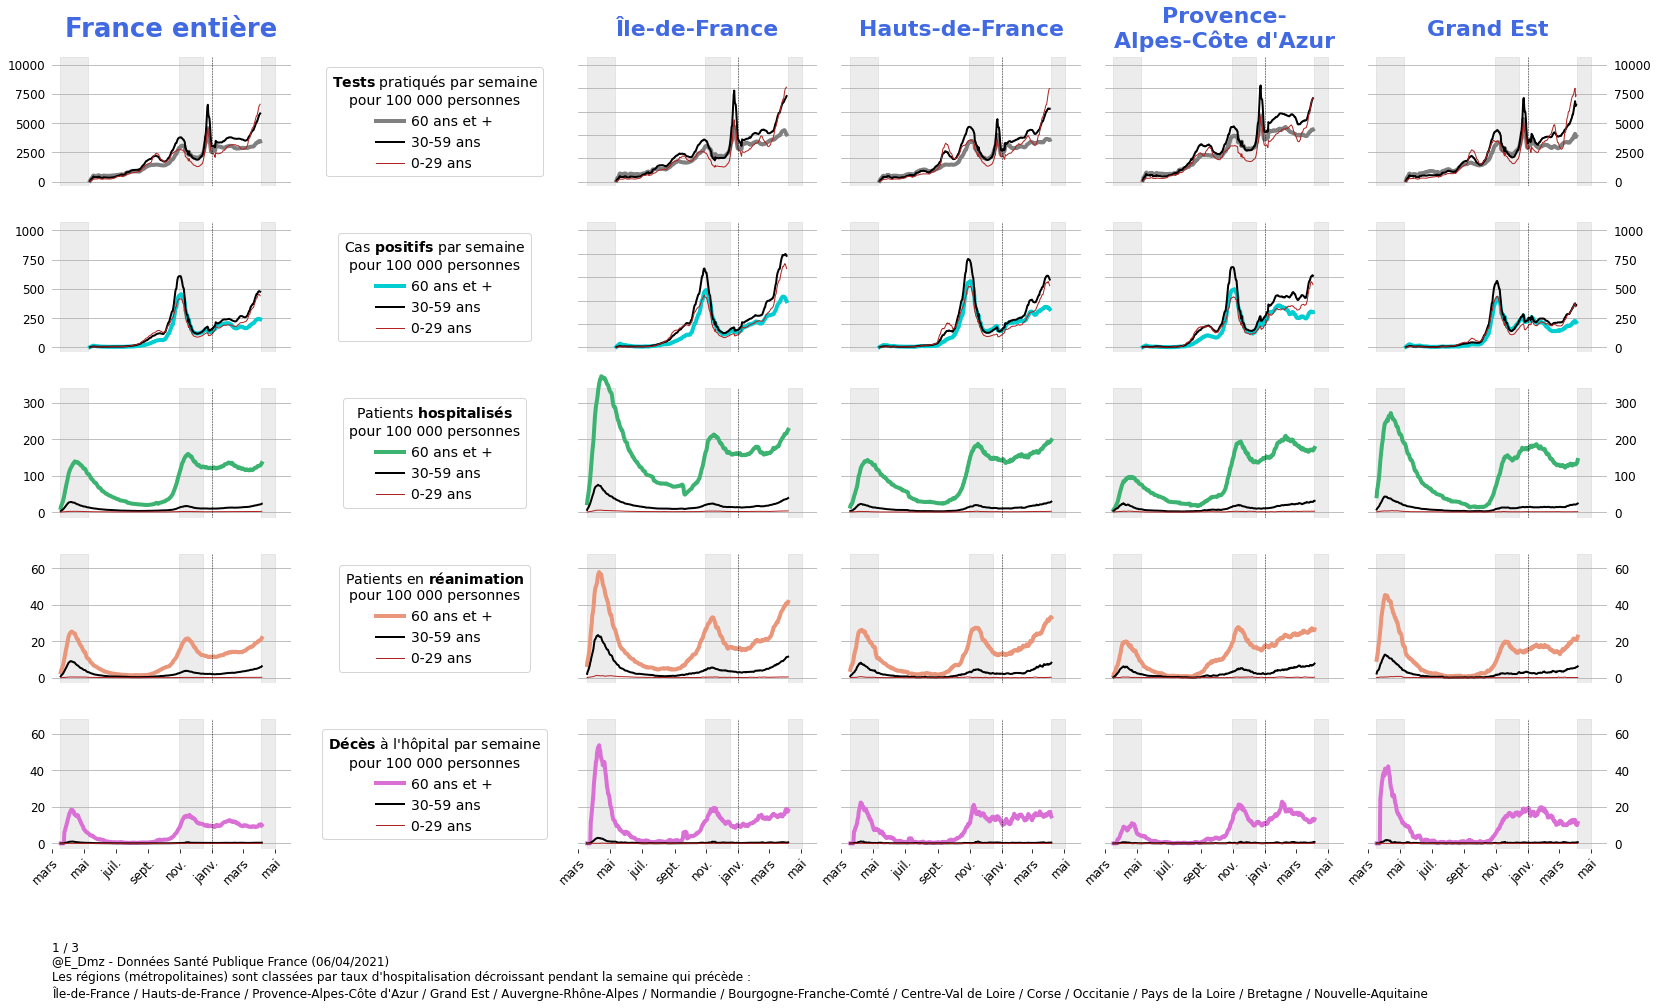

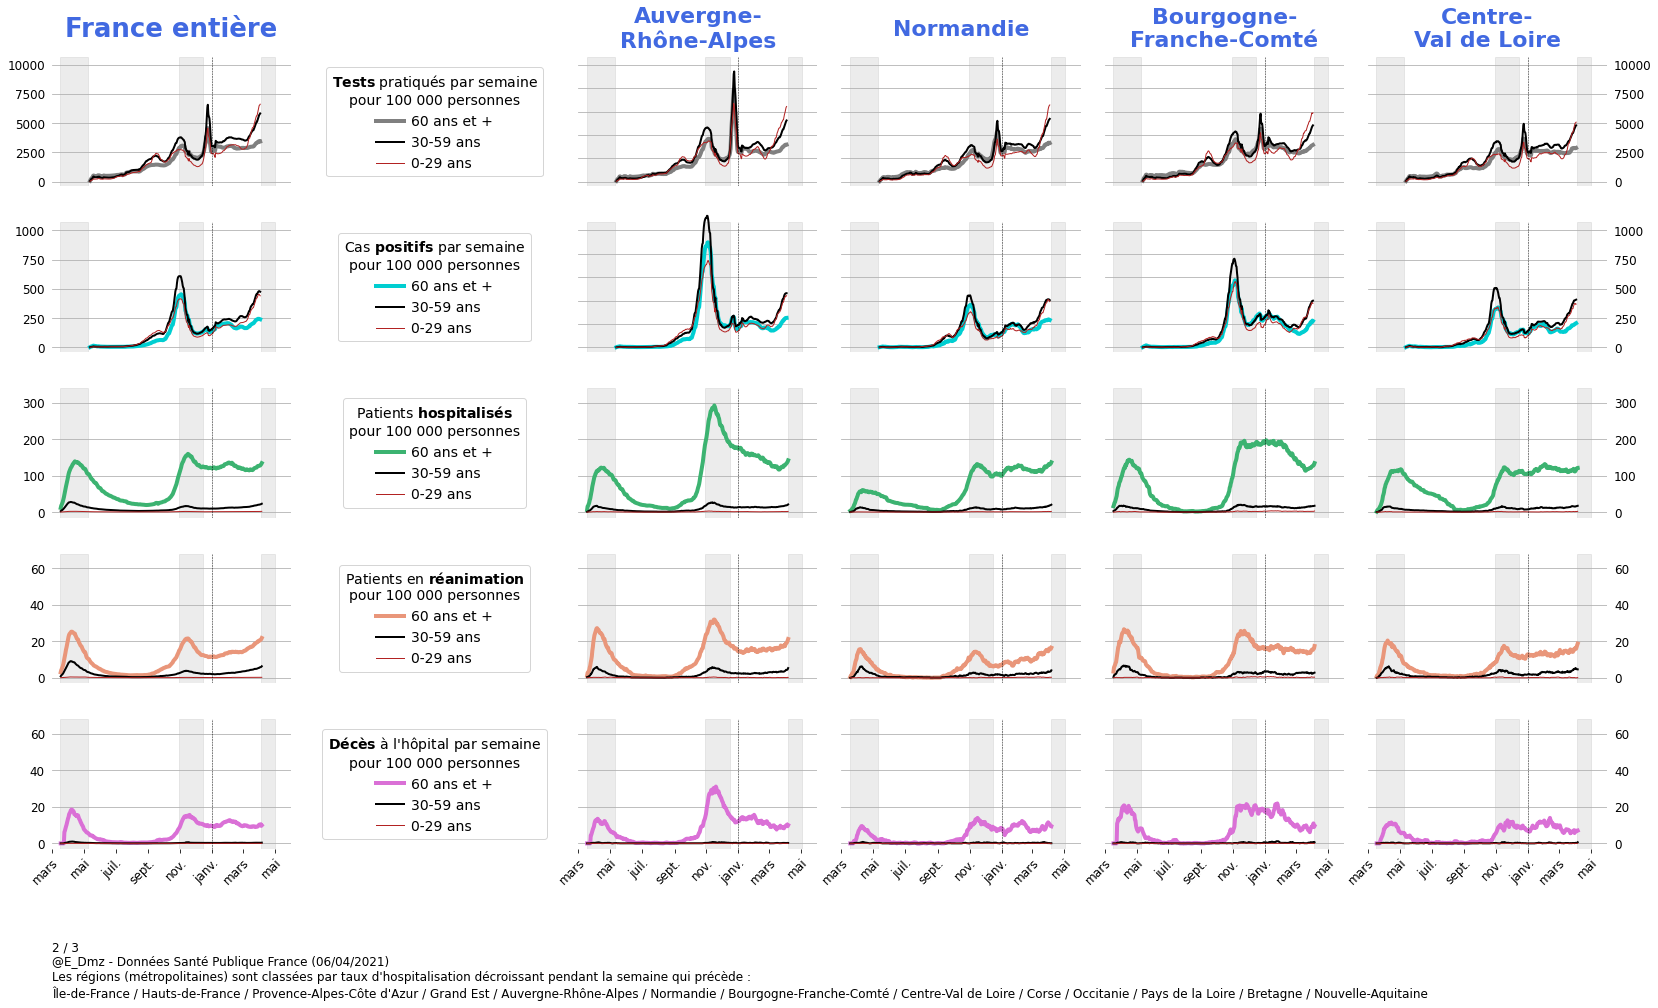

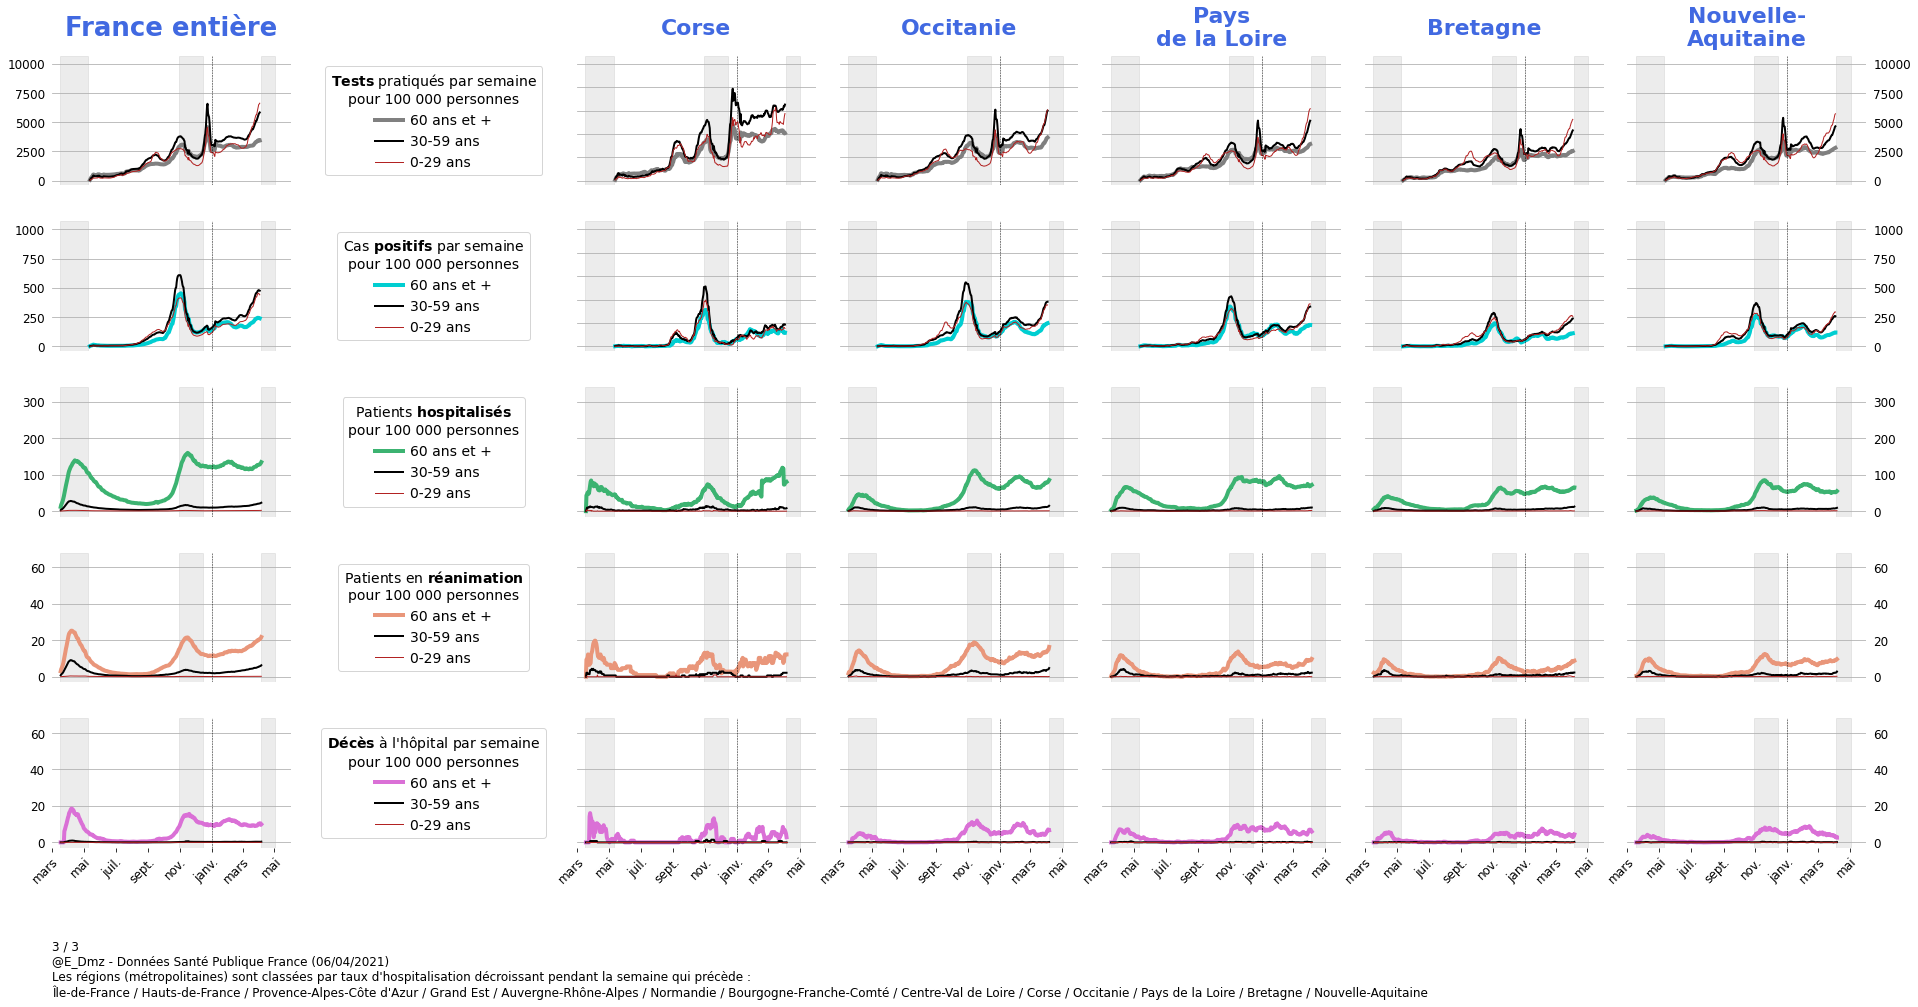

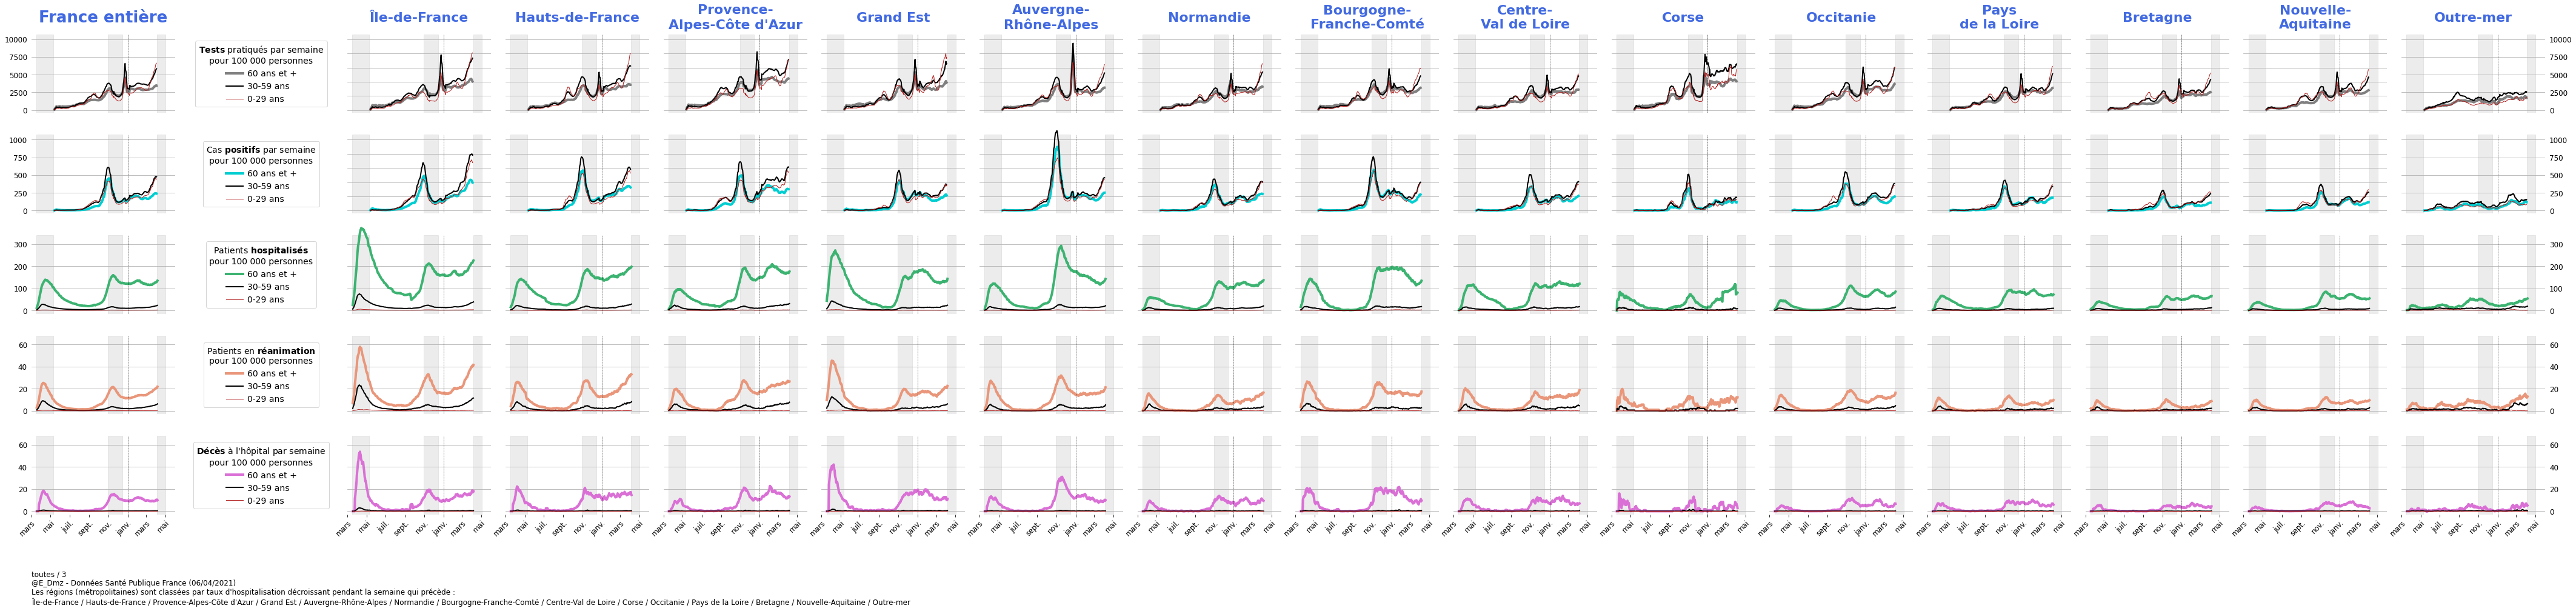

In [5]:
produce_fig_lines(d, regions_ordered[:4], regions_ordered[:-1], 1)
produce_fig_lines(d, regions_ordered[4:8], regions_ordered[:-1], 2)
produce_fig_lines(d, regions_ordered[8:-1], regions_ordered[:-1], 3)
produce_fig_lines(d, regions_ordered, regions_ordered, 'toutes')

In [ ]:
produce_fig(ymin = -40,
    ymax = 1190,
            d = d,
    column_to_plot = "incidence hebdo",
    main_color = "darkturquoise",
    title = '{}\nCas positifs par semaine\npour 100 000 personnes'.format(date_text),
    regions_ordered = regions_ordered,
    fname = fname_output_synth + '-fig-incidence',)
produce_fig(ymin = -400,
    ymax = 11900,
            d = d,
    column_to_plot = "taux de test hebdo",
    main_color = "gray",
    title = '{}\nTests pratiqués par semaine\npour 100 000 personnes'.format(date_text),
    regions_ordered = regions_ordered,
    fname = fname_output_synth + '-fig-tests',)
produce_fig(ymin = -4,
    ymax = 29,
            d = d,
    column_to_plot = "positivite hebdo",
    main_color = "orange",
    title = '{}\nTests positifs hebdomadaire\n(%)'.format(date_text),
    regions_ordered = regions_ordered,
    fname = fname_output_synth + '-fig-positifs',)
produce_fig(ymin = -15,
    ymax = 379,
            d = d,
    column_to_plot = "taux hosp",
    main_color = "mediumseagreen",
    title = '{}\nPatients hospitalisés\npour 100 000 personnes'.format(date_text),
    regions_ordered = regions_ordered,
    fname = fname_output_synth + '-fig-hosp',)
produce_fig(ymin = -3,
    ymax = 76,
            d = d,
    column_to_plot = "taux rea",
    main_color = "darksalmon",
    title = '{}\nPatients en réanimation\npour 100 000 personnes'.format(date_text),
    regions_ordered = regions_ordered,
    fname = fname_output_synth +  '-fig-rea',)
produce_fig(ymin = -3,
    ymax = 76,
            d = d,
    column_to_plot = "taux décès",
    main_color = "orchid",
    title = '{}\nDécès à l\'hôpital par semaine\npour 100 000 personnes)'.format(date_text),
    regions_ordered = regions_ordered,
    fname = fname_output_synth +  '-fig-deces',)

In [ ]:
fname = fname_temp_vac + '-tot-3C.csv'
d2 = pd.read_csv(fname, sep = ';', parse_dates = ['jour'], dtype = {'entity': str})
d2.sample(3)

In [ ]:
produce_fig(ymin = -10000,
    ymax = 70000,
            d = d2,
    column_to_plot = "taux dose 1",
    main_color = "orchid",
    title = '{}\nNombre de 1res doses cumulées\npour 100 000 personnes)'.format(date_text),
    regions_ordered = regions_ordered,
    fname = fname_output_synth +  '-fig-vac1',)

In [ ]:
produce_fig(ymin = -10000,
    ymax = 70000,
            d = d2,
    column_to_plot = "taux dose 2",
    main_color = "orchid",
    title = '{}\nNombre de 2es doses cumulées\npour 100 000 personnes)'.format(date_text),
    regions_ordered = regions_ordered,
    fname = fname_output_synth +  '-fig-vac2',)

In [ ]:
fig, axs = plt.subplots(11, 10, figsize = (15,20))
axs = axs.ravel()
for ax in axs:
    ax.set_axis_off()
for i, dep in enumerate(deps):
    sns.set_palette("mako",2)
    
    dplot = d.loc[d.dep == dep].loc[d.cl_age90 == 19]
    axs[i].plot(dplot.jour, dplot["incidence hebdo"], c = "darkturquoise", linewidth = 4)
    
    dplot = d.loc[d.dep == dep].loc[d.cl_age90 == 0]
    axs[i].plot(dplot.jour, dplot["incidence hebdo"], c = "black")
    
    dplot = d.loc[d.dep == dep].loc[d.cl_age90 == 89]
    #axs[i].plot(dplot.jour, dplot["incidence hebdo"], c = 'blue')
    axs[i].set_ylim(-500,1500)
    axs[i].set_axis_off()
    axs[i].set_title(dep, loc = 'left', y = 0.7, fontsize = 22, c = "darkturquoise")
    axs[i].set_title(dep_name[dep], x = -0.05, y = 0.2, rotation = 90, fontsize = 7)
fig.savefig("fig2.svg", pad_inches = 0)

In [ ]:
produce_fig_dep(d, deps)

In [ ]:
produce_fig_dep(d, reg2dep['Île-de-France'])

In [ ]:
for reg in regs:
    print(reg)
    produce_fig_dep(d, reg2dep[reg])